In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the train and test datasets
train=pd.read_csv(r"C:\Users\anikbakr\Kaggle\Spaceship Titanic\train.csv")
test=pd.read_csv(r"C:\Users\anikbakr\Kaggle\Spaceship Titanic\test.csv")
test_ans=pd.read_csv(r"C:\Users\anikbakr\Kaggle\Spaceship Titanic\sample_submission.csv")

In [3]:
# Step 2: Explore the train dataset
train.head()
train.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [4]:
# Step 3: Preprocess the train dataset
train.dropna(inplace=True)
train.set_index("PassengerId", inplace=True)
train.drop(["HomePlanet", "Cabin", "Destination","Name"], axis=1, inplace=True)

In [5]:
# Step 4: Print column names in the train dataset
train.columns


Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported'],
      dtype='object')

In [6]:
# Step 5: Encode categorical variables in the train dataset
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train.CryoSleep=le.fit_transform(train.CryoSleep)
train.VIP=le.fit_transform(train.VIP)
train.Transported=le.fit_transform(train.Transported)

In [7]:
# Step 6: Check correlation in the train dataset
cor_matrix=train.corr()
output_correlation = cor_matrix['Transported'].sort_values(ascending=False)
output_correlation

Transported     1.000000
CryoSleep       0.462803
FoodCourt       0.055025
ShoppingMall    0.011602
VIP            -0.042260
Age            -0.082553
VRDeck         -0.207950
Spa            -0.219854
RoomService    -0.247291
Name: Transported, dtype: float64

In [8]:
# Step 7: Drop unnecessary columns in the train dataset
train.drop(['VIP', 'Age','VRDeck','Spa','RoomService'],axis=1,inplace=True)

In [9]:
# Step 8: Prepare the train dataset for model training
x_train, y_train=train.drop(["Transported"], axis=1),train["Transported"]
x_train.shape
y_train.shape

(6606,)

In [10]:
# Step 9: Explore the test dataset
test.head()
test.shape
test_ans.shape
test_ans.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [11]:
# Step 10: Merge test dataset with the test answer dataset
test = pd.concat([test, test_ans.Transported], axis=1)
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,False
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,False
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,False


In [12]:
# Step 11: Drop missing values and unnecessary columns in the test dataset
test.dropna(inplace=True)
test.set_index("PassengerId", inplace=True)
test.drop(["HomePlanet", "Cabin", "Destination","Name"], axis=1, inplace=True)

In [13]:
# Step 12: Encode categorical variables in the test dataset
le=LabelEncoder()
test.CryoSleep=le.fit_transform(test.CryoSleep)
test.VIP=le.fit_transform(test.VIP)
test.Transported=le.fit_transform(test.Transported)

In [14]:
# Step 13: Drop unnecessary columns in the test dataset
test.drop(['VIP', 'Age','VRDeck','Spa','RoomService'],axis=1,inplace=True)

In [15]:
# Step 14: Prepare the test dataset for predictions
x_test=test.drop(['Transported'],axis=1)
x_test.shape
y_test=test['Transported']

In [16]:
# Step 15: Define the models for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [17]:
models=[]
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=50)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, random_state=50)))
models.append(('SVM', SVC(gamma='auto', random_state=50)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [18]:
# Step 16: Evaluate the models using cross-validation
from sklearn import model_selection

acc_results=[]
auc_results=[]
names=[]

col=['Algorithm','ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
df_results=pd.DataFrame(columns=col)
i=0
for name, model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=50,shuffle=True)
    cv_acc_results=model_selection.cross_val_score(model,x_train,y_train, cv=kfold, scoring='accuracy')
    cv_auc_results=model_selection.cross_val_score(model,x_train,y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i]=[name,
                        round(cv_auc_results.mean()*100,2),
                        round(cv_auc_results.std()*100,2),
                        round(cv_acc_results.mean()*100,2),
                        round(cv_acc_results.std()*100,2)
                       ]
    i+=1

In [19]:
# Step 17: Display the results
df_results.sort_values(by=['ROC AUC Mean'],ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
5,Gaussian NB,78.76,1.87,74.42,1.29
0,Logistic Regression,77.14,1.70,74.11,1.26
2,SVM,75.68,2.11,71.56,2.07
1,Random Forest,74.80,2.17,71.36,1.93
3,KNN,73.40,2.67,71.00,6.51
4,Decision Tree,67.51,2.42,70.94,2.13


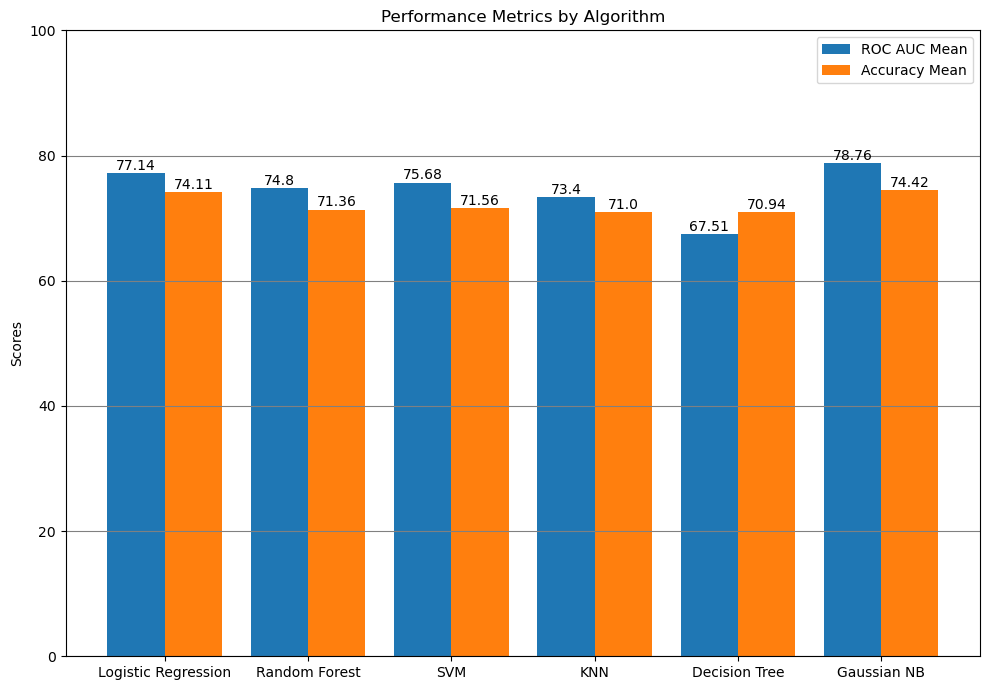

In [20]:
# Step 18: Plot the performance metrics for each algorithm
fig, ax = plt.subplots(figsize=(10,7))

# Plot the histogram for ROC AUC Mean
ax.bar(np.arange(len(df_results['Algorithm']))-0.2, df_results['ROC AUC Mean'], width=0.4, label='ROC AUC Mean')

# Plot the histogram for Accuracy Mean
ax.bar(np.arange(len(df_results['Algorithm']))+0.2, df_results['Accuracy Mean'], width=0.4, label='Accuracy Mean')

# Add value labels to the top of each bar
for i, v in enumerate(df_results['ROC AUC Mean']):
    ax.text(i - 0.2, v + 0.5, str(v), color='black', ha='center')

for i, v in enumerate(df_results['Accuracy Mean']):
    ax.text(i + 0.2, v + 0.5, str(v), color='black', ha='center')

    
# Set labels and title for the combined plot
ax.set_ylabel('Scores')
ax.set_ylim(top=100)
ax.set_title('Performance Metrics by Algorithm')
ax.set_xticks(np.arange(len(df_results['Algorithm'])))
ax.set_xticklabels(df_results['Algorithm'])
ax.grid(axis='y', c="grey")
ax.legend()

# Display the combined plot
plt.tight_layout()
plt.show()

In [21]:
# Step 19: Identify the best performing algorithm and evaluate its accuracy
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.5653764096312099